# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.650504e+01     1.387443e+01
 * time: 0.0017888545989990234
     1     3.081338e+01     8.923419e+00
 * time: 0.007233858108520508
     2     2.568569e+01     3.251073e+00
 * time: 0.06916999816894531
     3     2.174749e+01     2.497086e+00
 * time: 0.07445502281188965
     4     2.160078e+01     3.869146e+00
 * time: 0.07836484909057617
     5     2.088654e+01     2.010821e+00
 * time: 0.0832529067993164
     6     2.051300e+01     2.887028e+00
 * time: 0.08765792846679688
     7     2.040481e+01     3.388927e+00
 * time: 0.09202289581298828
     8     2.020488e+01     2.164027e+00
 * time: 0.09636187553405762
     9     1.956846e+01     2.223843e+00
 * time: 0.10072183609008789
    10     1.936000e+01     2.175825e+00
 * time: 0.10488605499267578
    11     1.873418e+01     1.395455e+00
 * time: 0.10910892486572266
    12     1.829194e+01     1.152498e+00
 * time: 0.11332988739013672
    13     1.799304e+01     9.953689e-01
 * tim

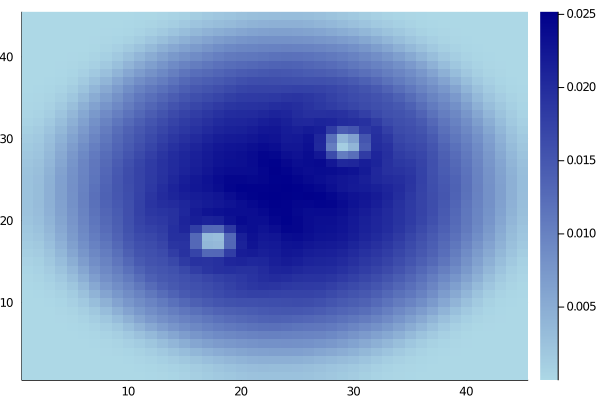

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)